In [ ]:
import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/DL/dog_face_detector/dogHeadDetector.dat')
predictor = dlib.shape_predictor('/content/drive/MyDrive/DL/dog_face_detector/landmarkDetector.dat')

In [ ]:
img_path = '/content/drive/MyDrive/DL/dog_face_detector/img/18.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

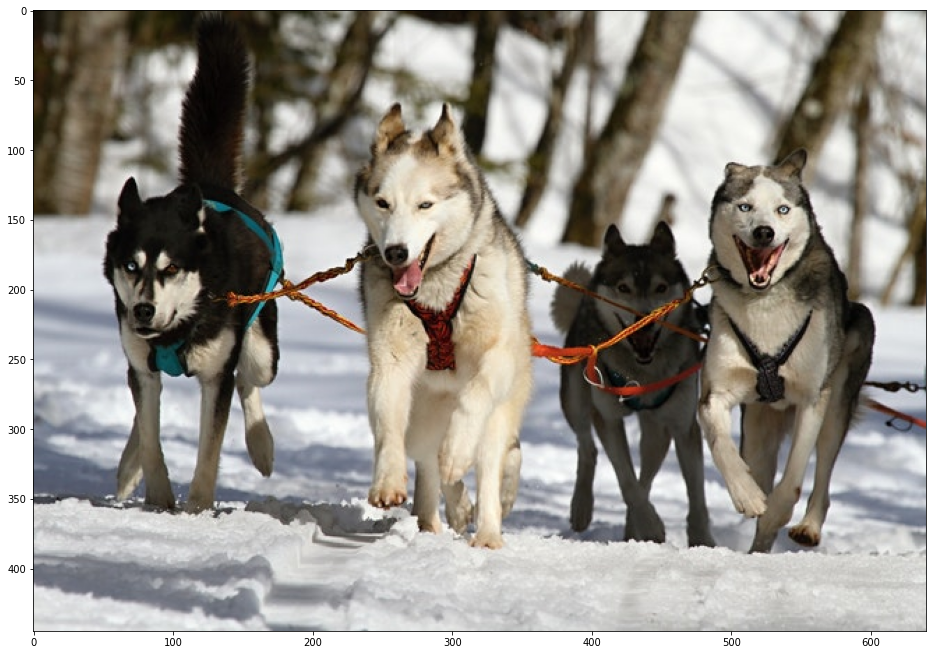

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(img)
plt.show()

In [ ]:
dets = detector(img, upsample_num_times=1)
print(dets)

mmod_rectangles[[(36, 155) (118, 237)], [(219, 105) (301, 187)], [(486, 119) (554, 188)]]


Detection 0: Letf: 36 Top: 155 Right: 118 Bottom: 237 Confidence: 1.0483734607696533
Detection 1: Letf: 219 Top: 105 Right: 301 Bottom: 187 Confidence: 1.0432591438293457
Detection 2: Letf: 486 Top: 119 Right: 554 Bottom: 188 Confidence: 1.028761386871338


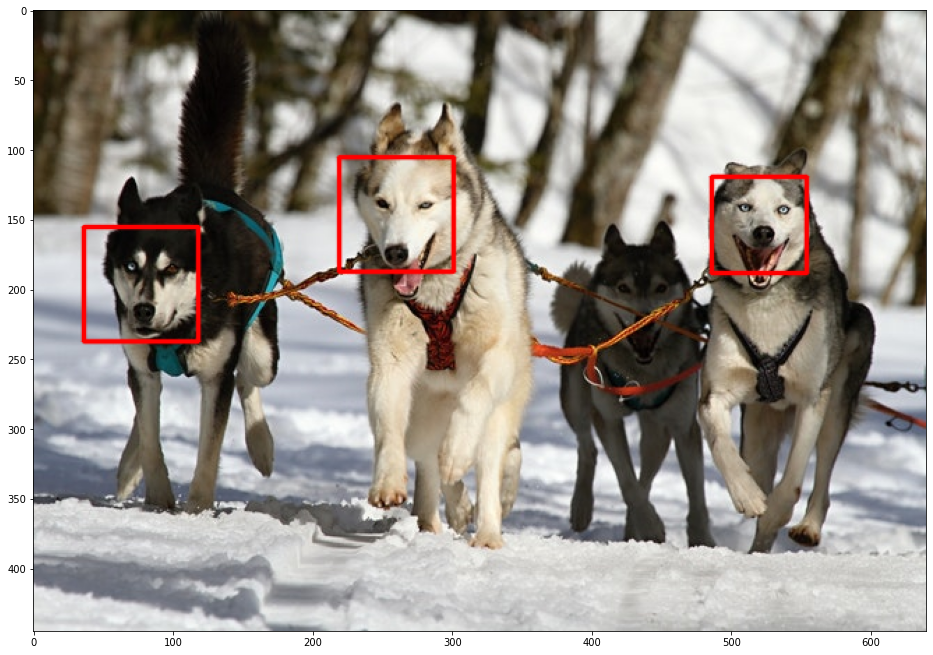

In [ ]:
img_result = img.copy()

for i, d in enumerate(dets):
  print("Detection {}: Letf: {} Top: {} Right: {} Bottom: {} Confidence: {}" .format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

  x1, y1 = d.rect.left(), d.rect.top()
  x2, y2 = d.rect.right(), d.rect.bottom()

  cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255, 0, 0), lineType=cv2.LINE_AA)

plt.figure(figsize=(16,16))
plt.imshow(img_result)

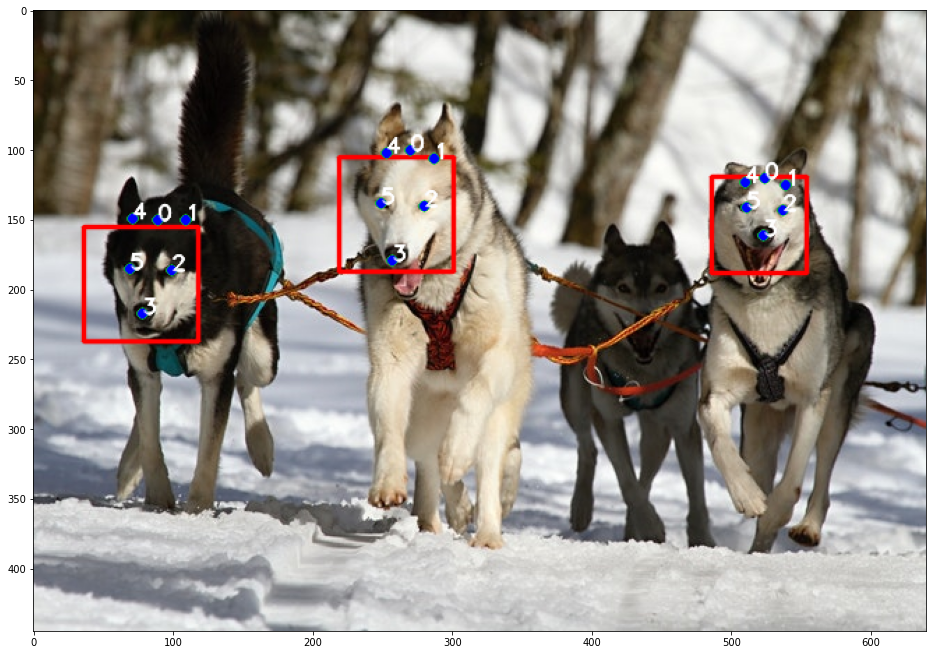

In [ ]:
shapes = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, center=tuple(p), radius=3, color=(0,0,255), thickness=-1, lineType=cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)

img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
cv2.imwrite('img/%s_out%s' % (filename, ext), img_out)
plt.figure(figsize=(16, 16))
plt.imshow(img_result)